In [2]:
import numpy as np   # 행렬 등의 연산
import pandas as pd  # data frame 처리
import matplotlib.pyplot as plt # 그래프
import seaborn as sns    # 그래프

plt.style.use('seaborn') # 그래프 테마
sns.set(font_scale=2.5)  # 글자 크기

import missingno as msno

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
# 1. Data set 확인
df_train = pd.read_csv('../input/train.csv')
df_test = pd.read_csv('../input/test.csv')

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df_train.shape   # 891 관측치, 12개 변수

(891, 12)

In [7]:
df_train.describe() # Age보면 결측치 존재 확인

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df_test.shape # 418개 관측치, 11개 변수

(418, 11)

In [9]:
df_test.describe()  # 역시 결측치 존재하는 것 같다.

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
# 1.1 결측치 check by for문
df_train.columns  # 행 이름 반환해줌

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
for col in df_train.columns: # {:>10} 오른쪽 정렬
    msg = 'col: {:>10}\t percent of NaN:  {:.2f}%'.format(col, 100*(df_train[col].isnull().sum()/df_train.shape[0]))
    print(msg)

col: PassengerId	 percent of NaN:  0.00%
col:   Survived	 percent of NaN:  0.00%
col:     Pclass	 percent of NaN:  0.00%
col:       Name	 percent of NaN:  0.00%
col:        Sex	 percent of NaN:  0.00%
col:        Age	 percent of NaN:  19.87%
col:      SibSp	 percent of NaN:  0.00%
col:      Parch	 percent of NaN:  0.00%
col:     Ticket	 percent of NaN:  0.00%
col:       Fare	 percent of NaN:  0.00%
col:      Cabin	 percent of NaN:  77.10%
col:   Embarked	 percent of NaN:  0.22%


In [12]:
for col in df_test.columns: 
    msg = 'col: {:>10}\t percent of NaN:  {:.2f}%'.format(col, 100*(df_test[col].isnull().sum()/df_test.shape[0]))
    print(msg)

col: PassengerId	 percent of NaN:  0.00%
col:     Pclass	 percent of NaN:  0.00%
col:       Name	 percent of NaN:  0.00%
col:        Sex	 percent of NaN:  0.00%
col:        Age	 percent of NaN:  20.57%
col:      SibSp	 percent of NaN:  0.00%
col:      Parch	 percent of NaN:  0.00%
col:     Ticket	 percent of NaN:  0.00%
col:       Fare	 percent of NaN:  0.24%
col:      Cabin	 percent of NaN:  78.23%
col:   Embarked	 percent of NaN:  0.00%


In [13]:
# Train set과 test set 모두 Age, Cabin, Embarked(Train만)에 null data 존재

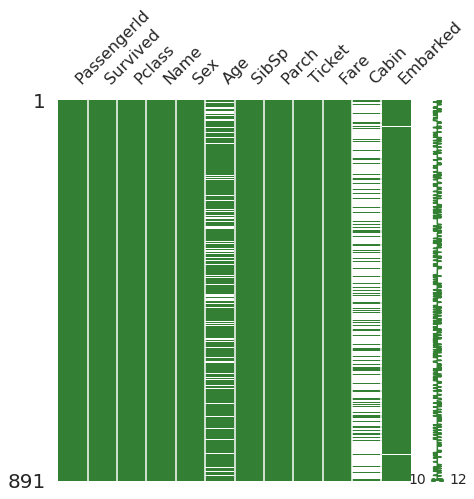

In [14]:
# missingno 라이브러리를 활용한 null data 탐색
msno.matrix(df=df_train.iloc[:,:], figsize=(7,7), color=(0.2,0.5,0.2))

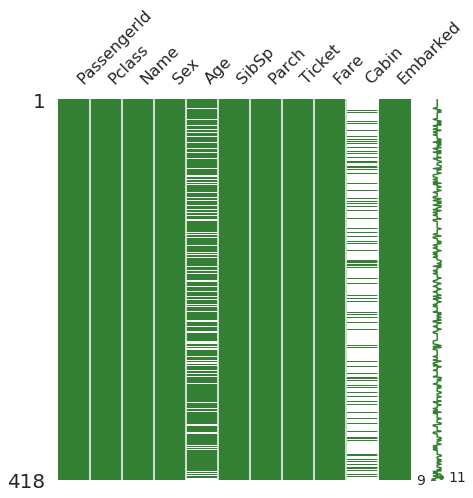

In [15]:
msno.matrix(df=df_test.iloc[:,:], figsize=(7,7), color=(0.2,0.5,0.2))

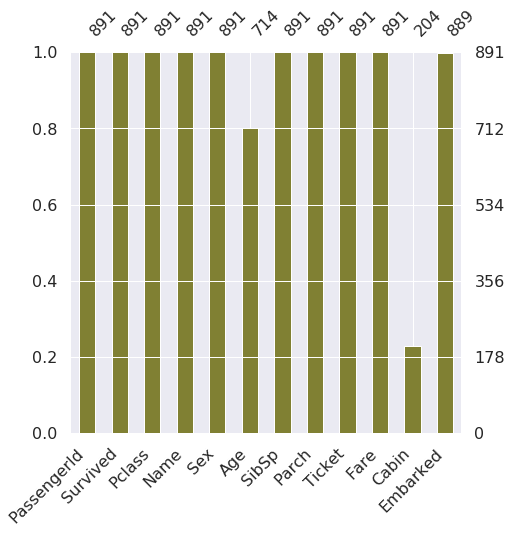

In [16]:
# missingno 라이브러리 활용한 null data 탐색 2
msno.bar(df_train.iloc[:,:],figsize=(7,7), color=(0.5,0.5,0.2))

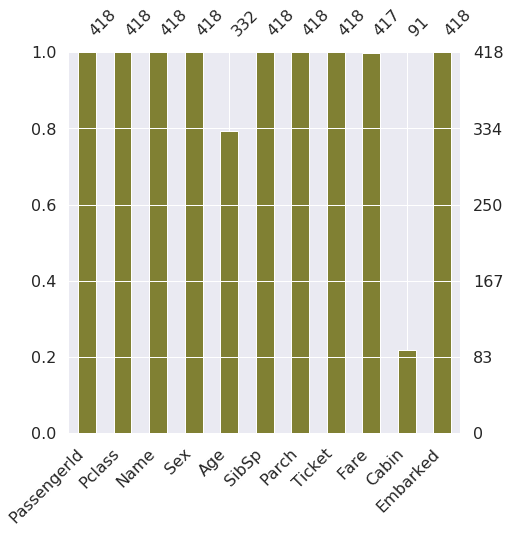

In [17]:
msno.bar(df_test.iloc[:,:],figsize=(7,7), color=(0.5,0.5,0.2))

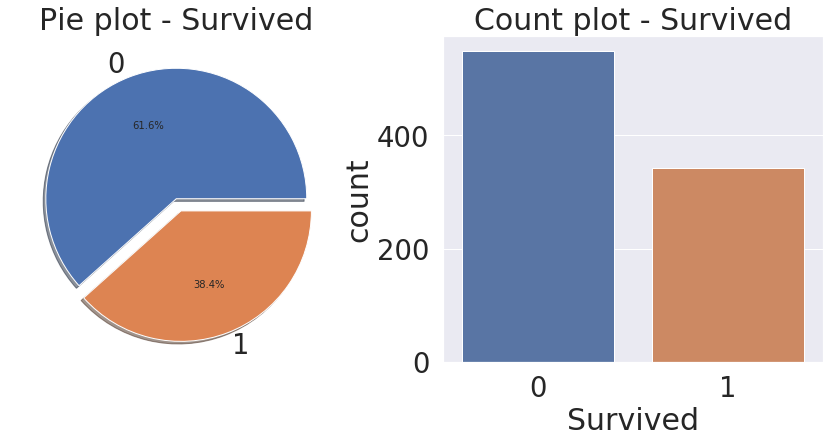

In [18]:
# 1.2 Target label 확인하기
#   - target label이 어떤 distribution을 갖는지 확인
#   - 모델의 평가 방법이 달라질 수 있음
f, ax = plt.subplots(1,2, figsize=(15, 6)) 

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True) # autopct='%1.1f%%': 퍼센트 표시, ax[0]: 1번째 plot에 그리겠다.
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')
plt.show()

In [19]:
# 38.4% 가 살아남았다.
# target label의 분포가 제법 balanced하다. 만약 불균일한 경우,
# 예를 들어 100 중 1이 99인 경우 모든 것을 1이라 예측하는 모델을
# 만든다면, 정확도가 99%인 모델이 된다. target이 0을 찾는 문제라면
# 의미없는 모델이 된다.

In [20]:
# Exploratory data analysis
# EDA를 위해 적절한 데이터 시각화가 필요
# 시각화 라이브러리로는 matplotlib, seaborn, plotly 등이 있다.

### 2.1 Pcalss
#### Pclass는 순서형 data
Pclass에 따른 생존률에 차이를 살펴볼 것

In [21]:
df_train[['Pclass','Survived']].groupby(['Pclass']).count()

,Survived
Pclass,
1,216
2,184
3,491


In [22]:
df_train[['Pclass','Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [23]:
# Survived는 0 또는 1의 값 --> sum()은 각 Pclass별 생존자 수가 됨

In [24]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='cool')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [25]:
df_train[['Pclass','Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


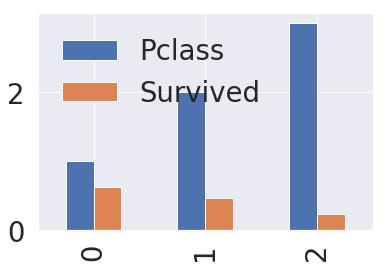

In [26]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False).plot.bar() # as_index를 하는 이유는 그림을 그리기 위함

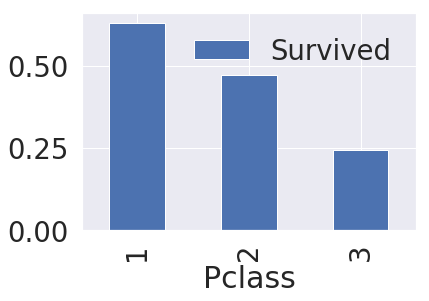

In [27]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar() # as_index를 하는 이유는 그림을 그리기 위함

In [28]:
# Pclass가 높을수록(1) 생존율이 높은 것을 확인할 수 있다.

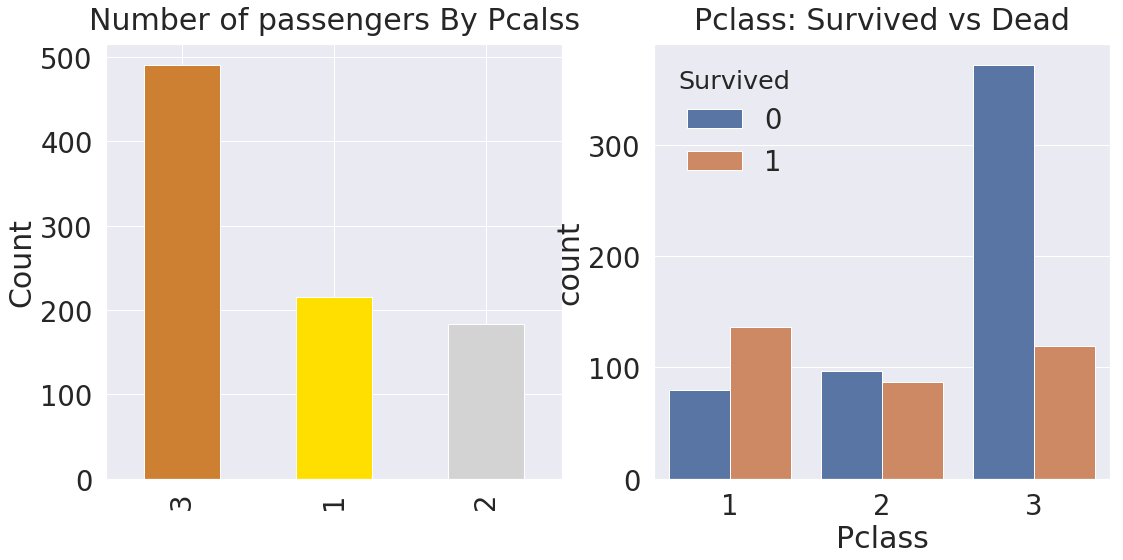

In [29]:
# seaborn의 countplot을 이용하면, 특정 label에 따른 개수를 확인해볼 수 있다.
y_position = 1.02
f, ax = plt.subplots(1,2,figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of passengers By Pcalss', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])  # hue는 Survived 값에 따라 색을 주어 표시하게 해줌
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

In [30]:
# 마찬가지로 Pclass가 높을수록(1) 생존율이 높은 것을 확인할 수 있다.
# 모델에 Pclass는 생존율을 예측하는 데 있어 좋은 변수가 될 것이라 판단된다.

In [31]:
# 2.2 Sex

In [32]:
df_train['Sex'].value_counts()   # male 577, female 314

male      577
female    314
Name: Sex, dtype: int64

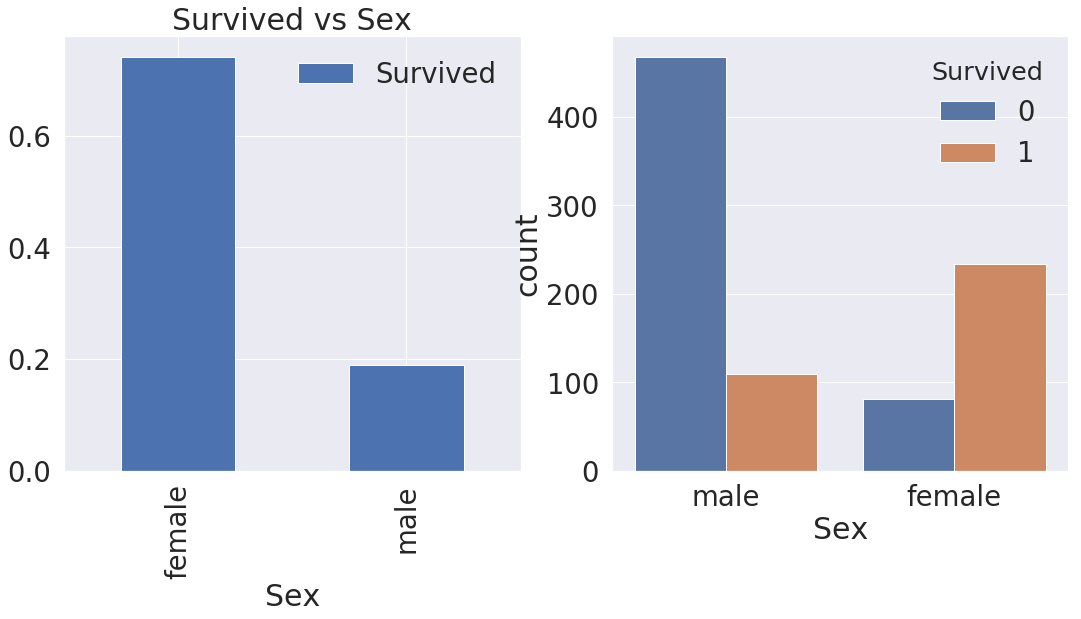

In [39]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex','Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0]) # ax_index로 성별이 column으로 감
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data= df_train, ax=ax[1])
plt.show()

In [ ]:
# 1) 전체 살아난 사람 중 여자의 생존 비율이 남자의 생존 비율보다 훨씬 높다
# 2) 마찬가지로 남자의 경우 생존비율은 매우 낮다.

In [44]:
# pandas의 crosstab을 이용하기
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [ ]:
# Sex 변수 역시 Pclass와 같이 생존 예측 모델에 좋은 변수가 될 것 같다.

In [ ]:
# 2.2 Both Sex and Pclass
# by factorplot of seaborn

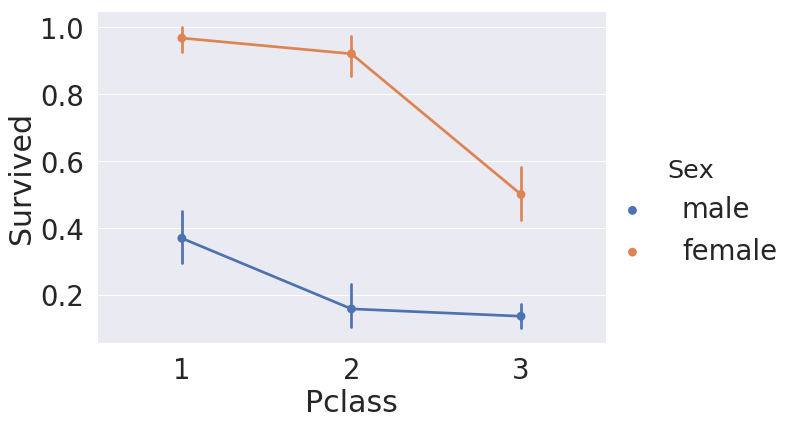

In [46]:
sns.factorplot('Pclass','Survived', hue='Sex', data=df_train, size=6, aspect=1.5)

In [ ]:
# 전체적으로 여자가 생존률이 높고, Pclass가 낮을수록 생존율이 낮다.

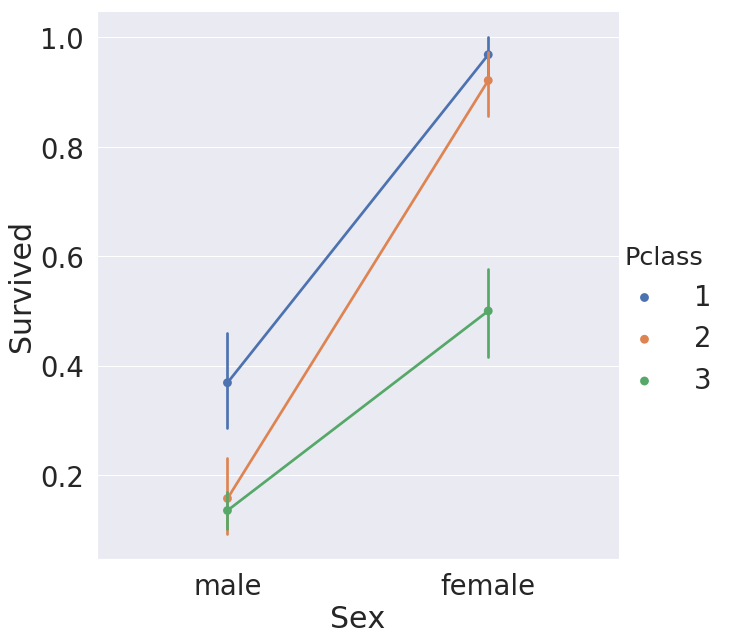

In [51]:
sns.factorplot(x='Sex',y='Survived',hue='Pclass',data=df_train, saturation=0.5, size=9, aspect=1)

In [ ]:
# Age

In [59]:
print('제일 나이 많은 탑승객 : {: .1f} years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {: .1f} years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {: .1f} years'.format(df_train['Age'].mean()))
df_train['Age'].describe()

제일 나이 많은 탑승객 :  80.0 years
제일 어린 탑승객 :  0.4 years
탑승객 평균 나이 :  29.7 years


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

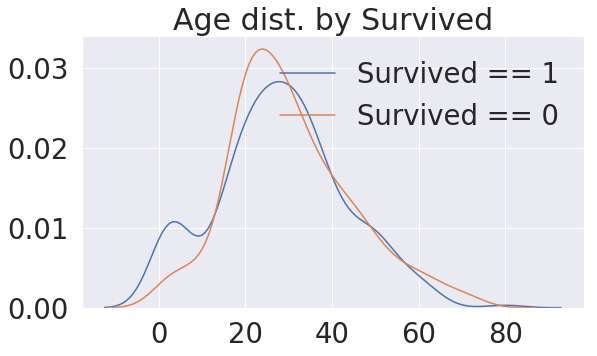

In [75]:
fig, ax = plt.subplots(1, 1, figsize= (9, 5))
sns.kdeplot(df_train[df_train['Survived']==1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'], ax= ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.title('Age dist. by Survived')
plt.show()

In [ ]:
# 나이가 어린 사람(약 15세 이하)의 생존 비율이 높고
# 젊은 사람들은 생존 비율이 낮으며
# 나이가 많은 사람들은 생존과 사망이 비슷하다.

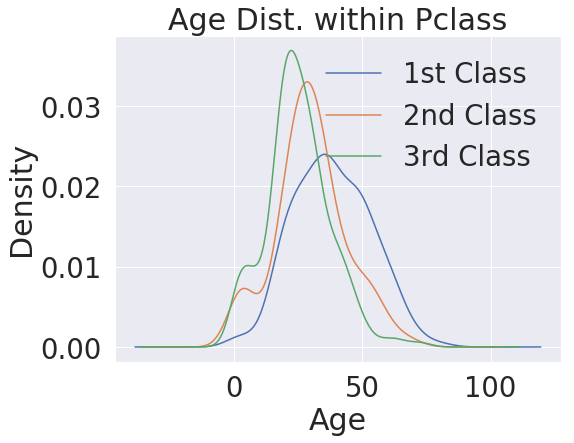